In [1]:
from common import plot_standings, NWSL
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("rank_by_week.csv", index_col=0)
df

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20
NJNY,1,7,8,10,10,5,7,8,10,8,9,9,11,11,12,12,12,12,12,12
POR,2,2,3,7,8,4,3,2,3,3,2,2,1,1,1,4,2,4,1,2
LA,3,6,2,2,2,7,4,6,6,5,7,7,7,7,7,7,7,7,8,8
CHI,4,4,6,6,7,3,2,3,2,2,3,4,4,6,6,6,6,6,7,6
WAS,5,3,7,8,9,10,8,7,9,11,11,10,10,10,11,11,10,10,11,11
SD,6,1,1,1,1,1,1,1,1,1,1,1,2,3,2,1,3,1,4,3
NC,7,11,12,12,12,12,12,12,12,12,12,12,12,12,10,9,8,8,6,7
RGN,8,10,10,9,3,6,6,5,4,4,6,5,6,5,5,5,5,5,2,1
LOU,9,9,9,3,5,8,9,9,8,10,10,11,9,9,9,10,11,11,10,9
HOU,10,5,4,4,4,2,5,4,5,6,4,3,3,2,3,2,4,2,5,4


<Figure size 432x288 with 0 Axes>

<Figure size 28800x16200 with 0 Axes>

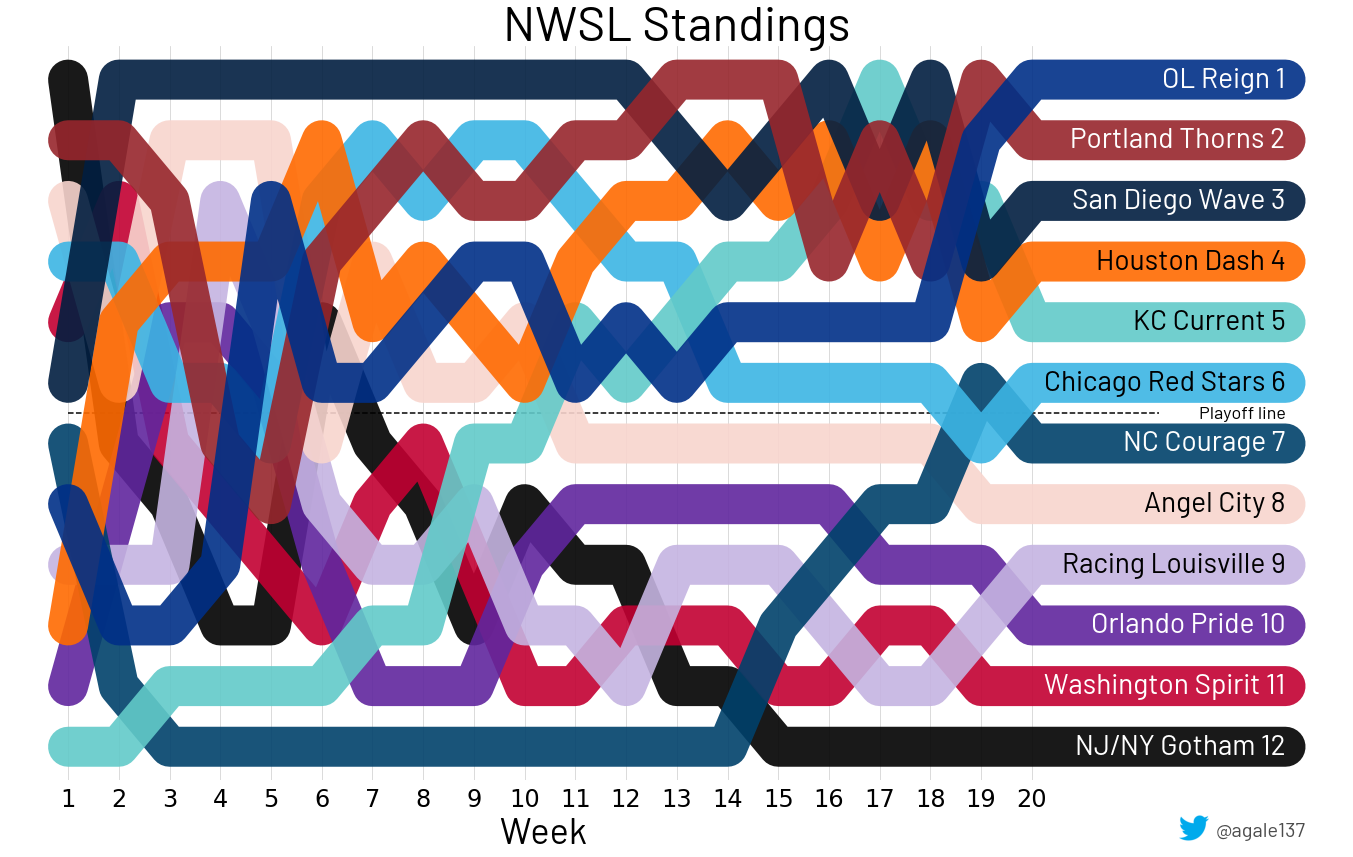

In [3]:
plot_standings(
    df,
    folder = "nwsl",
    playoff_cutoff=6,
    names=NWSL.NAMES,
    colors=NWSL.COLORS,
    text_colors=NWSL.TEXT_COLORS,
    title="NWSL Standings",
    extra_cols=5,
)